In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações globais para os plots (opcional, para melhor estética)
plt.rcParams.update({'font.size': 12, 'figure.figsize': (9, 6)})
plt.style.use('seaborn-v0_8-whitegrid') # Estilo visual agradável

# Visualizações para o Teorema de Existência e Unicidade de EDOs

Este notebook visa ilustrar conceitos-chave relacionados ao Teorema de Picard-Lindelöf (ou Cauchy-Lipschitz) para Equações Diferenciais Ordinárias (EDOs) de primeira ordem. Vamos explorar:
1.  Campos de Direções e soluções únicas.
2.  Um caso de não unicidade de solução.
3.  A natureza local do teorema (blow-up).
4.  As Iterações de Picard.

O teorema fundamentalmente afirma que, para um Problema de Valor Inicial (PVI) $y' = f(t,y)$ com $y(t_0) = y_0$:
*   Se $f(t,y)$ é **contínua** em uma região retangular $R$ contendo $(t_0, y_0)$, e
*   Se $f(t,y)$ satisfaz uma **condição de Lipschitz** em relação a $y$ em $R$,
então existe uma **solução única** $y(t)$ para o PVI em algum intervalo $|t-t_0| \le h$ em torno de $t_0$.

## 1. Campo de Direções e Solução Única (Exemplo: $y' = y$)

A EDO $y' = y$ significa que a inclinação da curva solução $y(t)$ em qualquer ponto $(t, y)$ é igual ao valor de $y$ nesse ponto. A função $f(t,y) = y$ é contínua e Lipschitz em $y$ em todo o plano $\mathbb{R}^2$ (pois $\frac{\partial f}{\partial y} = 1$, que é contínua e limitada). Portanto, esperamos uma solução única para qualquer condição inicial.

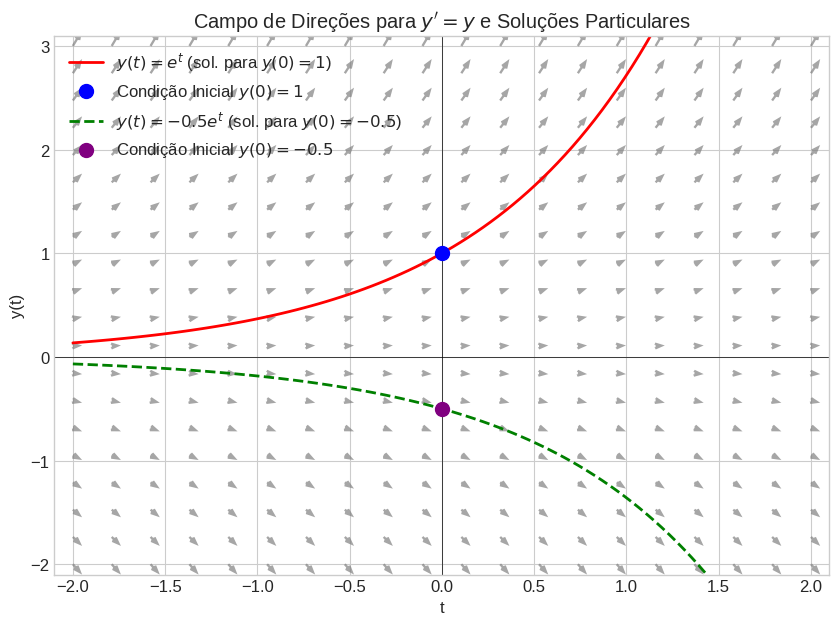

In [2]:
def plot_campo_direcoes_y_prime_igual_y():
    t_vals = np.linspace(-2, 2, 20)
    y_vals = np.linspace(-2, 3, 20)
    T, Y = np.meshgrid(t_vals, y_vals)
    dT = np.ones_like(T)
    dY = Y # y' = Y

    plt.figure(figsize=(10, 7))
    plt.quiver(T, Y, dT, dY, angles='xy', scale_units='xy', scale=20, color='gray', alpha=0.7, headwidth=3, headlength=4)

    t_sol = np.linspace(-2, 2, 100)
    # Solução para y(0) = 1 => y(t) = e^t
    y_sol1 = np.exp(t_sol)
    plt.plot(t_sol, y_sol1, color='red', linewidth=2, label=r'$y(t) = e^t$ (sol. para $y(0)=1$)')
    plt.scatter([0], [1], color='blue', s=100, zorder=5, label='Condição Inicial $y(0)=1$')

    # Solução para y(0) = -0.5 => y(t) = -0.5e^t
    y_sol2 = -0.5 * np.exp(t_sol)
    plt.plot(t_sol, y_sol2, color='green', linestyle='--', linewidth=2, label=r'$y(t) = -0.5e^t$ (sol. para $y(0)=-0.5$)')
    plt.scatter([0], [-0.5], color='purple', s=100, zorder=5, label='Condição Inicial $y(0)=-0.5$')

    plt.title(r"Campo de Direções para $y' = y$ e Soluções Particulares")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.xlim([-2.1, 2.1])
    plt.ylim([-2.1, 3.1])
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()

plot_campo_direcoes_y_prime_igual_y()

## 2. Campo de Direções (Exemplo: $y' = t$)

Para $y' = t$, a inclinação da solução $y(t)$ em $(t, y)$ depende apenas de $t$. A função $f(t,y) = t$ é contínua e Lipschitz em $y$ em todo o plano $\mathbb{R}^2$ (pois $\frac{\partial f}{\partial y} = 0$, que é contínua e limitada). Esperamos soluções únicas. As soluções são da forma $y(t) = t^2/2 + C.

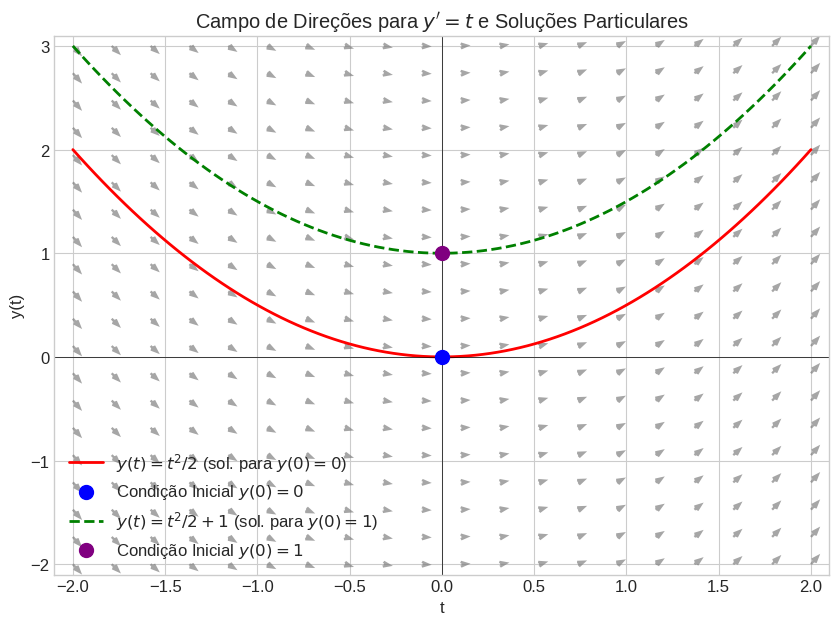

In [3]:
def plot_campo_direcoes_y_prime_igual_t():
    t_vals = np.linspace(-2, 2, 20)
    y_vals = np.linspace(-2, 3, 20)
    T, Y = np.meshgrid(t_vals, y_vals)
    dT = np.ones_like(T)
    dY = T # y' = T

    plt.figure(figsize=(10, 7))
    plt.quiver(T, Y, dT, dY, angles='xy', scale_units='xy', scale=20, color='gray', alpha=0.7, headwidth=3, headlength=4)

    t_sol = np.linspace(-2, 2, 100)
    # Solução para y(0) = 0 => y(t) = t^2/2
    y_sol1 = t_sol**2 / 2
    plt.plot(t_sol, y_sol1, color='red', linewidth=2, label=r'$y(t) = t^2/2$ (sol. para $y(0)=0$)')
    plt.scatter([0], [0], color='blue', s=100, zorder=5, label='Condição Inicial $y(0)=0$')

    # Solução para y(0) = 1 => y(t) = t^2/2 + 1
    y_sol2 = t_sol**2 / 2 + 1
    plt.plot(t_sol, y_sol2, color='green', linestyle='--', linewidth=2, label=r'$y(t) = t^2/2 + 1$ (sol. para $y(0)=1$)')
    plt.scatter([0], [1], color='purple', s=100, zorder=5, label='Condição Inicial $y(0)=1$')

    plt.title(r"Campo de Direções para $y' = t$ e Soluções Particulares")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.xlim([-2.1, 2.1])
    plt.ylim([-2.1, 3.1])
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()

plot_campo_direcoes_y_prime_igual_t()

## 3. Não Unicidade (Exemplo: $y' = \sqrt{|y|}$, com $y(0)=0$)

A EDO é $y' = \sqrt{|y|}$ com a condição inicial $y(0)=0$.
A função $f(t,y) = \sqrt{|y|}$ é contínua em $y=0$.
No entanto, vamos verificar a condição de Lipschitz. A derivada parcial de $f$ em relação a $y$ é:
$\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (|y|^{1/2}) = \frac{1}{2} |y|^{-1/2} \cdot \text{sgn}(y)$ (para $y \neq 0$).
Esta derivada $\frac{\partial f}{\partial y}$ é **ilimitada** quando $y \to 0$. Portanto, $f(t,y)$ **não é Lipschitz** em relação a $y$ em qualquer região que contenha a reta $y=0$.
O Teorema de Peano (que requer apenas continuidade de $f$) garante a *existência* de soluções, mas o Teorema de Picard-Lindelöf não garante a *unicidade*. De fato, veremos múltiplas soluções.

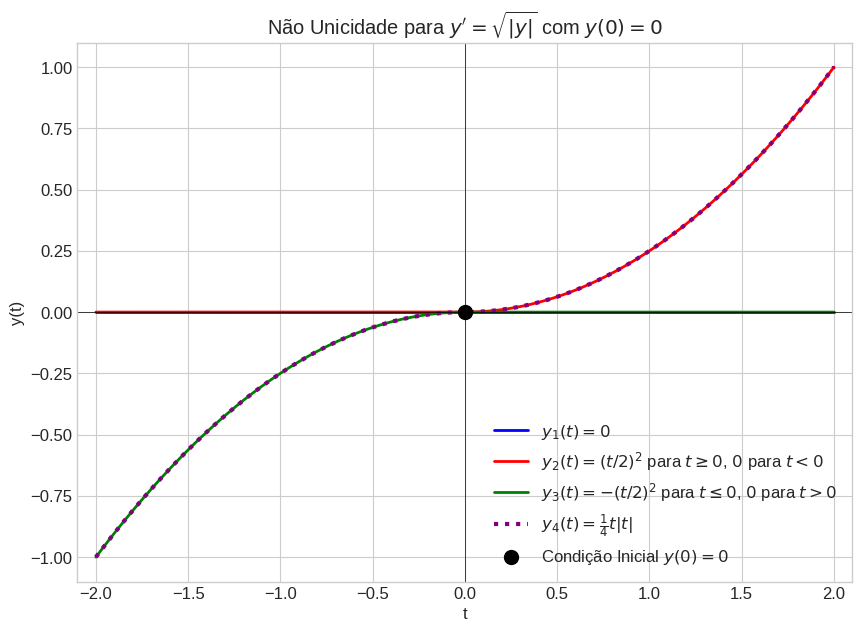

In [4]:
def plot_nao_unicidade():
    plt.figure(figsize=(10, 7))
    t_vals = np.linspace(-2, 2, 400)

    # Solução 1: y(t) = 0
    y_sol1 = np.zeros_like(t_vals)
    plt.plot(t_vals, y_sol1, color='blue', linewidth=2, label=r'$y_1(t) = 0$')

    # Solução 2a: y(t) = (t/2)^2 para t >= 0, e 0 para t < 0
    y_sol2a = np.piecewise(t_vals, [t_vals < 0, t_vals >= 0], [lambda x: 0, lambda x: (x/2)**2])
    plt.plot(t_vals, y_sol2a, color='red', linewidth=2, label=r'$y_2(t) = (t/2)^2$ para $t \geq 0$, $0$ para $t<0$')

    # Solução 2b: y(t) = -(t/2)^2 para t <= 0, e 0 para t > 0
    y_sol2b = np.piecewise(t_vals, [t_vals <= 0, t_vals > 0], [lambda x: -(x/2)**2, lambda x: 0])
    plt.plot(t_vals, y_sol2b, color='green', linewidth=2, label=r'$y_3(t) = -(t/2)^2$ para $t \leq 0$, $0$ para $t>0$')
    
    # Solução "combinada" C1: y(t) = (1/4) * t * |t|
    y_sol_combined = 0.25 * np.sign(t_vals) * t_vals**2
    plt.plot(t_vals, y_sol_combined, color='purple', linestyle=':', linewidth=3, label=r'$y_4(t) = \frac{1}{4} t|t|$')

    plt.scatter([0], [0], color='black', s=100, zorder=5, label='Condição Inicial $y(0)=0$')
    plt.title(r"Não Unicidade para $y' = \sqrt{|y|}$ com $y(0)=0$")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.ylim([-1.1, 1.1])
    plt.xlim([-2.1, 2.1])
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()

plot_nao_unicidade()

## 4. Existência Local / "Blow-up" (Exemplo: $y' = y^2$, com $y(0)=1$)

A EDO $y' = y^2$ com $y(0)=1$. A função $f(t,y) = y^2$ é contínua e localmente Lipschitz ( $\frac{\partial f}{\partial y} = 2y$ é contínua, portanto $f$ é Lipschitz em qualquer retângulo limitado).
O teorema garante existência e unicidade *localmente*. A solução analítica é $y(t) = \frac{1}{1-t}$.
Esta solução "explode" (vai para o infinito) quando $t \to 1^-$. O intervalo de existência da solução para este PVI é $(-\infty, 1)$. O teorema garante uma solução em torno de $t_0=0$, por exemplo, para $|t| \le h$ para algum $h>0$ (neste caso, $h$ pode ser qualquer valor menor que 1).

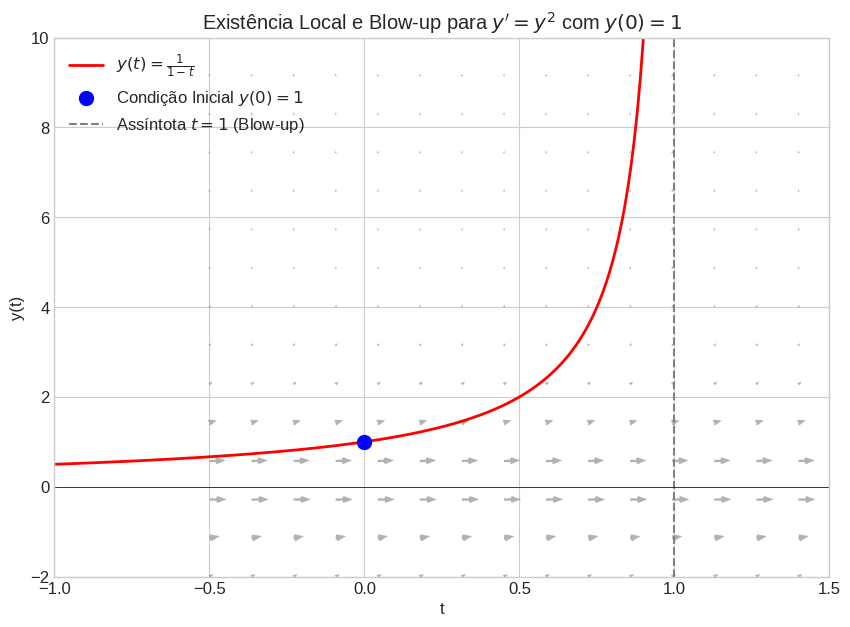

In [5]:
def plot_blow_up():
    plt.figure(figsize=(10, 7))
    
    t_vals_before = np.linspace(-1, 0.99, 200) # Aproximar-se de 1 pela esquerda
    y_sol_before = 1 / (1 - t_vals_before)

    plt.plot(t_vals_before, y_sol_before, color='red', linewidth=2, label=r'$y(t) = \frac{1}{1-t}$')
    plt.scatter([0], [1], color='blue', s=100, zorder=5, label='Condição Inicial $y(0)=1$')
    plt.axvline(1, color='gray', linestyle='--', label='Assíntota $t=1$ (Blow-up)')

    # Campo de direções (para ilustrar)
    t_field = np.linspace(-0.5, 1.4, 15) 
    y_field = np.linspace(-2, 10, 15) 
    T, Y = np.meshgrid(t_field, y_field)
    dT = np.ones_like(T)
    dY = Y**2
    
    # Normalizar para melhor visualização e evitar setas muito longas
    norm = np.sqrt(dT**2 + dY**2)
    np.seterr(divide='ignore', invalid='ignore') # Ignorar avisos
    dT_norm = dT / norm
    dY_norm = dY / norm
    dT_norm = np.nan_to_num(dT_norm) # Substituir NaN por 0 se norm for 0
    dY_norm = np.nan_to_num(dY_norm)

    plt.quiver(T, Y, dT_norm, dY_norm, angles='xy', scale_units='xy', scale=18, color='gray', alpha=0.6, headwidth=3, headlength=4, width=0.003)

    plt.title(r"Existência Local e Blow-up para $y' = y^2$ com $y(0)=1$")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.ylim([-2, 10]) 
    plt.xlim([-1, 1.5])
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.show()

plot_blow_up()

## 5. Iterações de Picard (Exemplo: $y' = y$, com $y(0)=1$)

A prova do Teorema de Picard-Lindelöf é construtiva e usa o método das aproximações sucessivas (ou iterações de Picard).
O PVI $y' = f(t,y)$, $y(t_0)=y_0$ é equivalente à equação integral:
$y(t) = y_0 + \int_{t_0}^t f(s, y(s)) ds$

As iterações são definidas como:
$\phi_0(t) = y_0$
$\phi_{n+1}(t) = y_0 + \int_{t_0}^t f(s, \phi_n(s)) ds$

Para $y' = y$ e $y(0)=1$:
$t_0=0, y_0=1, f(s,y(s)) = y(s)$.
$\phi_0(t) = 1$
$\phi_1(t) = 1 + \int_0^t \phi_0(s) ds = 1 + \int_0^t 1 ds = 1 + t$
$\phi_2(t) = 1 + \int_0^t \phi_1(s) ds = 1 + \int_0^t (1+s) ds = 1 + t + \frac{t^2}{2}$
$\phi_3(t) = 1 + \int_0^t \phi_2(s) ds = 1 + \int_0^t (1+s+\frac{s^2}{2}) ds = 1 + t + \frac{t^2}{2} + \frac{t^3}{6}$
Essa sequência converge para $y(t) = e^t$.

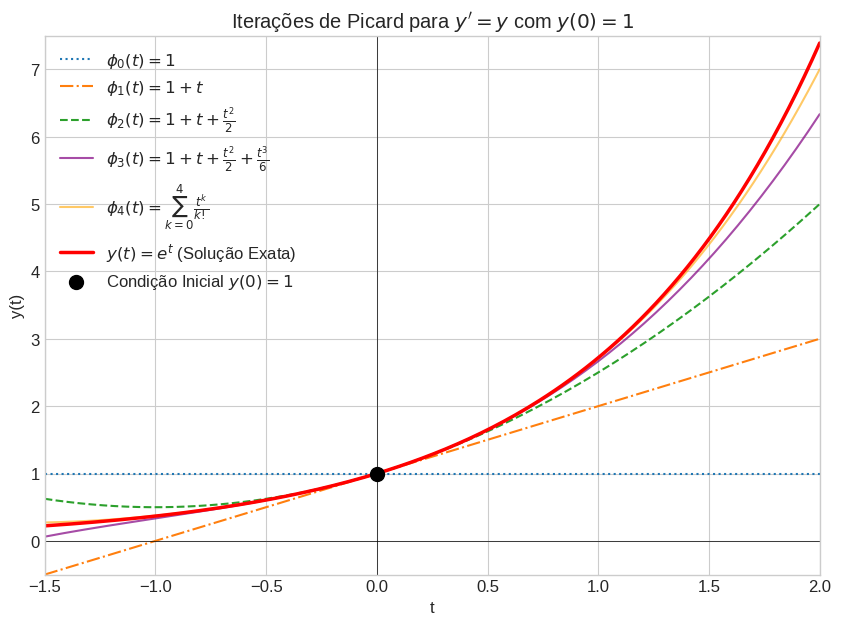

In [6]:
def plot_picard_iterations():
    plt.figure(figsize=(10, 7))
    t_vals = np.linspace(-1.5, 2, 200)

    # Condição inicial
    y0 = 1
    t0 = 0

    # Iterações de Picard
    phi_0 = np.full_like(t_vals, y0)
    plt.plot(t_vals, phi_0, linestyle=':', label=r'$\phi_0(t) = 1$')

    phi_1 = y0 + (t_vals - t0)
    plt.plot(t_vals, phi_1, linestyle='-.', label=r'$\phi_1(t) = 1 + t$')

    phi_2 = y0 + (t_vals - t0) + (t_vals - t0)**2 / 2
    plt.plot(t_vals, phi_2, linestyle='--', label=r'$\phi_2(t) = 1 + t + \frac{t^2}{2}$')

    phi_3 = y0 + (t_vals - t0) + (t_vals - t0)**2 / 2 + (t_vals - t0)**3 / 6
    plt.plot(t_vals, phi_3, linestyle='-', color='purple', alpha=0.7, label=r'$\phi_3(t) = 1 + t + \frac{t^2}{2} + \frac{t^3}{6}$')
    
    phi_4 = y0 + (t_vals - t0) + (t_vals - t0)**2 / 2 + (t_vals - t0)**3 / 6 + (t_vals - t0)**4 / 24
    plt.plot(t_vals, phi_4, linestyle='-', color='orange', alpha=0.6, label=r'$\phi_4(t) = \sum_{k=0}^4 \frac{t^k}{k!}$')

    # Solução exata
    y_exact = np.exp(t_vals - t0) * y0 
    plt.plot(t_vals, y_exact, color='red', linewidth=2.5, label=r'$y(t) = e^t$ (Solução Exata)')

    plt.scatter([t0], [y0], color='black', s=100, zorder=5, label=f'Condição Inicial $y({t0})={y0}$')
    plt.title(r"Iterações de Picard para $y' = y$ com $y(0)=1$")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.ylim([-0.5, 7.5]) 
    plt.xlim([-1.5, 2])
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()

plot_picard_iterations()

## Conclusão

As visualizações demonstram:
*   Como as soluções "seguem" o campo de direções quando as condições do Teorema de Picard-Lindelöf são satisfeitas, levando à unicidade.
*   O que pode acontecer quando a condição de Lipschitz falha (não unicidade).
*   Que a garantia de existência e unicidade é local, e soluções podem "explodir" em tempo finito.
*   A ideia construtiva por trás da prova do teorema através das iterações de Picard.

Esses conceitos são fundamentais para entender por que podemos confiar que muitos problemas de EDOs são bem postos e para o desenvolvimento de métodos numéricos para resolvê-los.